**Authors:** Jozef Hanč, Martina Hančová  <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Marsaglia vs. Pham-Gia forms - equivalence
</font>

<font size=5> Computational tools: </font>  **<font size=5>SageMath</font>**  

---


## Analytic forms 
Marsaglia 2006
- Marsaglia, George. 2006. “Ratios of Normal Variables.” Journal of Statistical Software 16 (4). https://doi.org/10.18637/jss.v016.i04.


$$
f_T(t) = \frac{\exp\left(-\frac{a^2 + b^2}{2}\right)}{\pi (1 + t^2)}\left( 1 + q \exp\left(\frac{q^2}{2}\right) \int_0^q \exp\left(-\frac{x^2}{2}\right) \, dx \right), \quad q = \frac{b + a t}{\sqrt{1 + t^2}}
$$

Pham-Gia 2007
- Pham-Gia, T., Turkkan, N., & Marchand, E. (2007). Density of the Ratio of Two Normal Random Variables and Applications. Communications in Statistics - Theory and Methods, 35(9), 1569–1591. https://doi.org/10.1080/03610920600683689

$$\left( 1 + q \exp\left(\frac{q^2}{2}\right) \int_0^q \exp\left(-\frac{x^2}{2}\right) \, dx \right)= {}_1F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array}; \frac{q^2}{2}\right)$$

$$
f_T(t) = \frac{\exp\left(-\frac{a^2 + b^2}{2}\right)}{\pi (1 + t^2)}{}_1F_1\left(\begin{array}{c}
1 \\
1 / 2
\end{array};\frac{q^2}{2}\right), \quad q = \frac{b + a t}{\sqrt{1 + t^2}}
$$


# Defining diferent parts of formulas

In [1]:
# Define variables
a, b, t, q = var('a, b, t, q')

# Given that q = (b + a*t) / sqrt(1 + t^2) is the upper bound from 0 to q, 
# the following holds:
assume(b+a*t>0)

**Marsaglia 2006**

In [2]:
fMars(q) = (1+q*exp(1/2*q^2)*integral(exp(-1/2*x^2),x, 0, q, hold=True))
fMars(q).show()

q*e^(1/2*q^2)*integrate(e^(-1/2*x^2), x, 0, q) + 1

**Pham-Gia 2007**

In [3]:
M(a,b,z) = hypergeometric_M(a,b,z)

In [4]:
M(a,b,z).generalized().show()

hypergeometric((a,), (b,), z)

In [5]:
fPham(q) = M(1,1/2, q^2/2).generalized()
fPham(q).show()

hypergeometric((1,), (1/2,), 1/2*q^2)

# Analytical comparison of formulas

In [6]:
assume(q > 0)
(fMars(q)-fPham(q)).simplify_hypergeometric().canonicalize_radical()

0

# Grahical comparison of formulas

## Marsaglia 2006

In [7]:
# general definition
f_k(t) = exp(-(a^2+b^2)/2)/(pi*(1+t^2))
q = (b + a*t)/sqrt(1+t^2)
# formula
f_m(t) = f_k(t)*(1+q*exp(1/2*q^2)*integral(exp(-1/2*x^2),x, 0, q))
f_m.show()

t |--> 1/2*(sqrt(2)*sqrt(pi)*(a*t + b)*erf(1/2*sqrt(2)*(a*t + b)/sqrt(t^2 + 1))*e^(1/2*(a*t + b)^2/(t^2 + 1))/sqrt(t^2 + 1) + 2)*e^(-1/2*a^2 - 1/2*b^2)/(pi*(t^2 + 1))

In [8]:
# for specific values from the preprint
a_val, b_val = 3/2, 1
values = [a == a_val, b == b_val]
f_m(t) = f_m(t).subs(values)
f_m.show()

t |--> 1/4*(sqrt(2)*sqrt(pi)*(3*t + 2)*erf(1/4*sqrt(2)*(3*t + 2)/sqrt(t^2 + 1))*e^(1/8*(3*t + 2)^2/(t^2 + 1))/sqrt(t^2 + 1) + 4)*e^(-13/8)/(pi*(t^2 + 1))

## Pham-Gia 2007

In [9]:
# general definition
f_p(t) = f_k(t)*M(1,1/2, q^2/2)

In [10]:
show(f_p(t).simplify_hypergeometric().canonicalize_radical())

(sqrt(pi)*(I*a*t + I*b)*erf(1/2*sqrt(2)*(I*a*t + I*b)/sqrt(-t^2 - 1))*e^(1/2*(a^2*t^2 + 2*a*b*t + b^2)/(t^2 + 1)) + sqrt(2)*sqrt(-t^2 - 1))/((sqrt(2)*pi*t^2*e^(1/2*a^2 + 1/2*b^2) + sqrt(2)*pi*e^(1/2*a^2 + 1/2*b^2))*sqrt(-t^2 - 1))

In [11]:
# for specific values
f_p(t) = f_p(t).subs(values)
f_p.show()

t |--> e^(-13/8)*hypergeometric_M(1, 1/2, 1/8*(3*t + 2)^2/(t^2 + 1))/(pi*(t^2 + 1))

In [12]:
f_p.simplify_hypergeometric().canonicalize_radical().show()

1/2*(sqrt(pi)*(3*I*t + 2*I)*erf(1/4*sqrt(2)*(3*I*t + 2*I)/sqrt(-t^2 - 1))*e^(1/8*(9*t^2 + 12*t + 4)/(t^2 + 1)) + 2*sqrt(2)*sqrt(-t^2 - 1))*e^(-5/8)/((sqrt(2)*pi*t^2*e + sqrt(2)*pi*e)*sqrt(-t^2 - 1))

## Plots

In [13]:
# Layout of the plots
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Parameters for the graph
color = 'blue'
graphTitle = f'Density function of the ratio: ${str(values).replace('==','=')}$'
legendTitle = ['PDF Marsaglia','PDF Pham-Gia']
xmin, xmax = -4.5, 7.5
gf = plot([], figsize=(8, 5), title=graphTitle, frame=True)

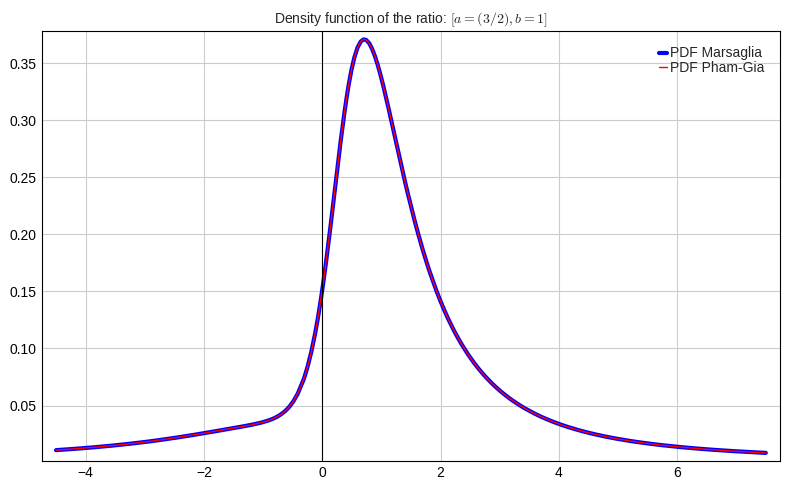

In [14]:
# plot of fT
gf+= plot(f_m(t), (t, xmin, xmax), color='blue', thickness=3, legend_label=legendTitle[0])
gf+= plot(f_p(t), (t, xmin, xmax), color='red',legend_label=legendTitle[1])
gf